<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/Jobs_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the dataset (assuming 'salary' is the target variable)
dataset = pd.read_csv("jobs_in_data.csv")

In [53]:
dataset.head

<bound method NDFrame.head of       work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd e

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [55]:
dataset.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [56]:
dataset.count()

work_year             9355
job_title             9355
job_category          9355
salary_currency       9355
salary                9355
salary_in_usd         9355
employee_residence    9355
experience_level      9355
employment_type       9355
work_setting          9355
company_location      9355
company_size          9355
dtype: int64

In [57]:
dataset.count

<bound method DataFrame.count of       work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_us

In [58]:
# Select features and target variable
X = dataset[['work_year', 'salary_in_usd']]  # Adjust features accordingly

In [59]:
y = dataset['salary']

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize the linear regression model
model = LinearRegression()

In [62]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions on the test set
predictions = model.predict(X_test)


In [64]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 100723158.55905911


In [65]:
 #You can now use the trained model to make predictions on new data.
# For example:
new_data = np.array([[2024, 100000]])  # Adjust features for the new data
prediction_new_data = model.predict(new_data)
print(f'Predicted Salary for New Data: {prediction_new_data}')


Predicted Salary for New Data: [98566.21425274]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")


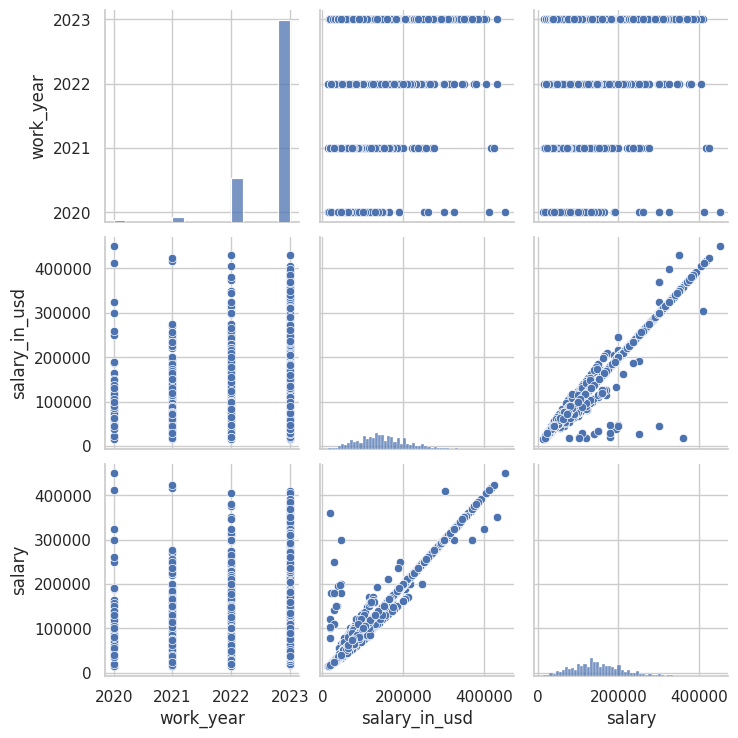

In [67]:
# Pairplot for exploring relationships between numerical variables
sns.pairplot(dataset[['work_year', 'salary_in_usd', 'salary']])
plt.show()


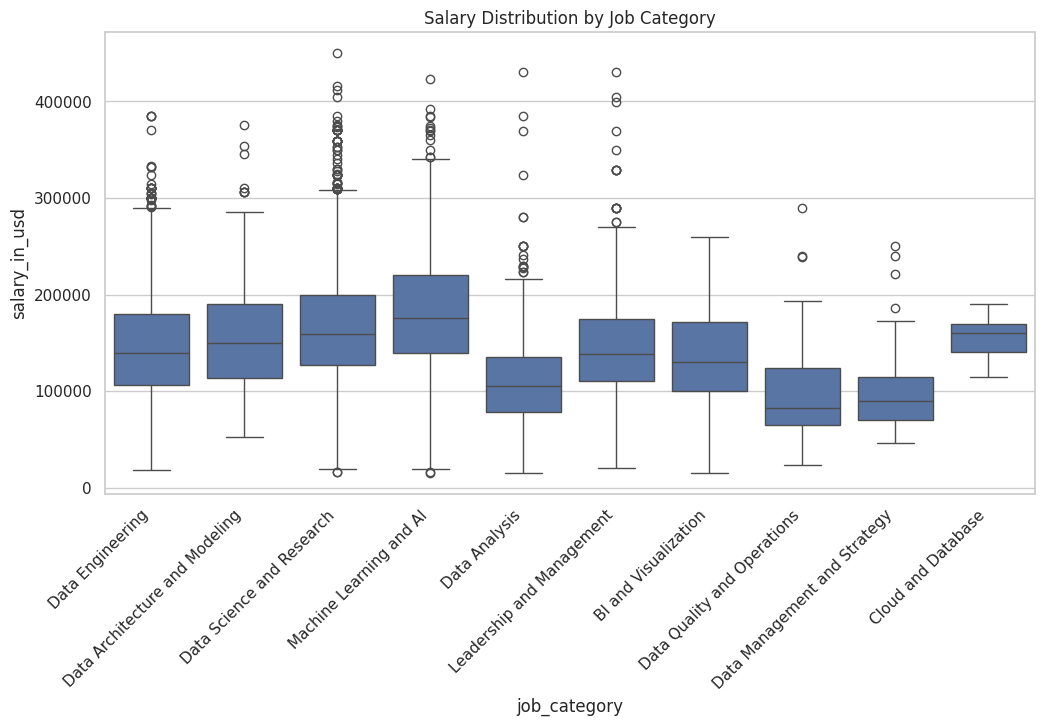

In [68]:
# Boxplot to visualize the distribution of salaries based on job categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=dataset)
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Job Category')
plt.show()


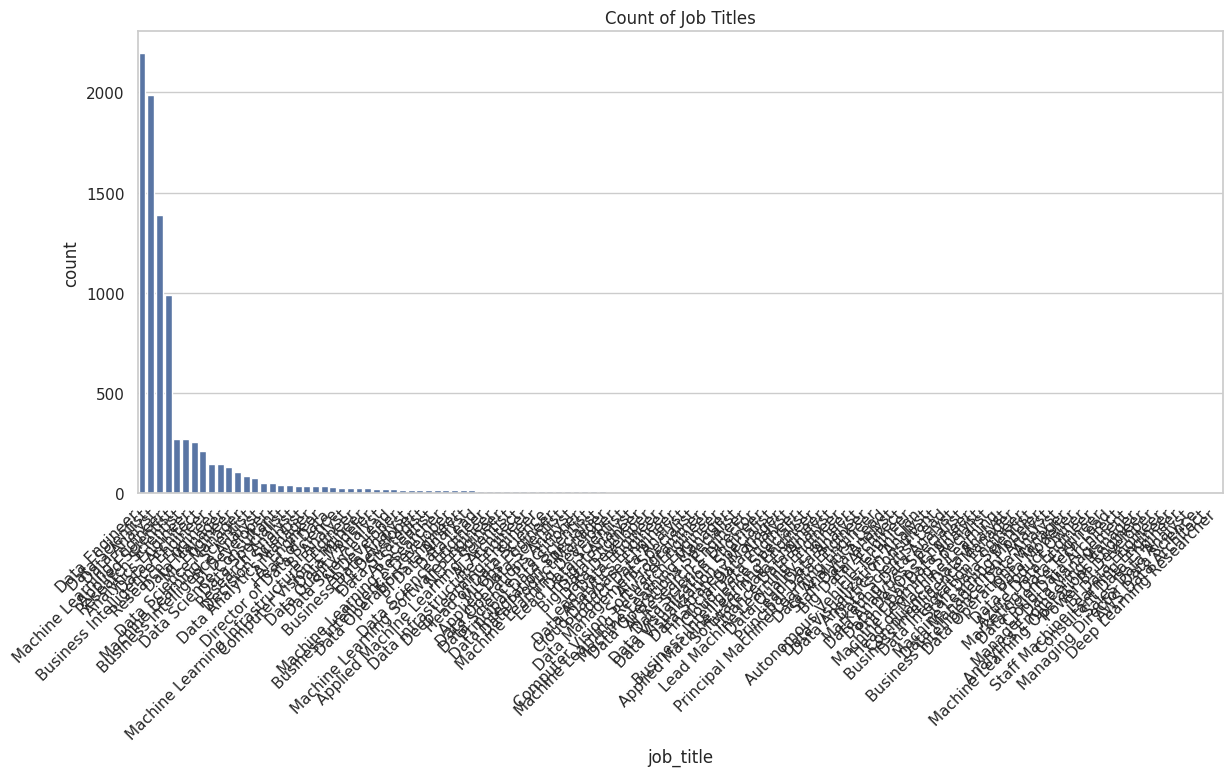

In [69]:
# Countplot for job titles
plt.figure(figsize=(14, 6))
sns.countplot(x='job_title', data=dataset, order=dataset['job_title'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Job Titles')
plt.show()
